In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(np.__version__)

2.2.1


In [3]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")
df2 = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
df = pd.concat([df,df2],axis=0)

In [5]:
df = df.drop(columns='CustomerID',axis=1)

In [9]:
df[df['Churn']==0]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
135,36.0,Female,5.0,6.0,0.0,6.0,Premium,Quarterly,787.0,9.0,0.0
146,48.0,Male,49.0,20.0,1.0,7.0,Standard,Quarterly,953.0,30.0,0.0
153,24.0,Male,14.0,22.0,2.0,17.0,Basic,Quarterly,594.0,18.0,0.0
176,48.0,Male,3.0,30.0,1.0,10.0,Premium,Annual,850.0,29.0,0.0
187,32.0,Female,35.0,9.0,1.0,15.0,Premium,Quarterly,951.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45677,65.0,Male,8.0,13.0,1.0,27.0,Basic,Monthly,121.0,13.0,0.0
45678,55.0,Female,42.0,18.0,2.0,2.0,Premium,Annual,193.0,10.0,0.0
45679,64.0,Female,2.0,6.0,0.0,22.0,Premium,Quarterly,809.0,6.0,0.0
45682,54.0,Male,15.0,30.0,7.0,5.0,Standard,Annual,838.0,12.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  float64
 3   Usage Frequency    505206 non-null  float64
 4   Support Calls      505206 non-null  float64
 5   Payment Delay      505206 non-null  float64
 6   Subscription Type  505206 non-null  object 
 7   Contract Length    505206 non-null  object 
 8   Total Spend        505206 non-null  float64
 9   Last Interaction   505206 non-null  float64
 10  Churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


In [7]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [8]:
df.dropna(inplace=True)

In [9]:
categorical = [x for x in df if df[x].dtype=='O']
numerical = [x for x in df if df[x].dtype!='O']

In [10]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder # type: ignore
le = LabelEncoder()
oe1 = OrdinalEncoder(categories=[['Basic','Standard','Premium']])
oe2 = OrdinalEncoder(categories=[['Monthly','Quarterly','Annual']])

In [11]:
for x in categorical:
    if x=='Gender':
        df[x] = le.fit_transform(df[[x]])
    elif x=='Subscription Type':
        df[x] = oe1.fit_transform(df[[x]])
    else:
        df[x] = oe2.fit_transform(df[[x]])

/Users/ppraveen/Documents/ML_practise/practise/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
df.head(5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,1.0,2.0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0.0,0.0,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0.0,1.0,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,1.0,0.0,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0.0,0.0,617.0,20.0,1.0


In [13]:
y = df['Churn']
X = df.drop(columns='Churn',axis=1)

In [14]:
import pickle
with open('minmax_scale.pkl','rb') as file:
    minmax = pickle.load(file)

In [15]:
scaled_age = (30.0 - minmax.data_min_[0]) / (minmax.data_max_[0] - minmax.data_min_[0])
print("Scaled Age:", scaled_age)


Scaled Age: 0.2553191489361702


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
X_train.loc[0]

Age                   30.0
Gender                 0.0
Tenure                39.0
Usage Frequency       14.0
Support Calls          5.0
Payment Delay         18.0
Subscription Type      1.0
Contract Length        2.0
Total Spend          932.0
Last Interaction      17.0
Name: 0, dtype: float64

In [18]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(353644, 10)
(353644,)
(151562, 10)
(151562,)


In [19]:
categorical = [x for x in df if df[x].dtype=='O']
numerical = [x for x in df if df[x].dtype!='O']

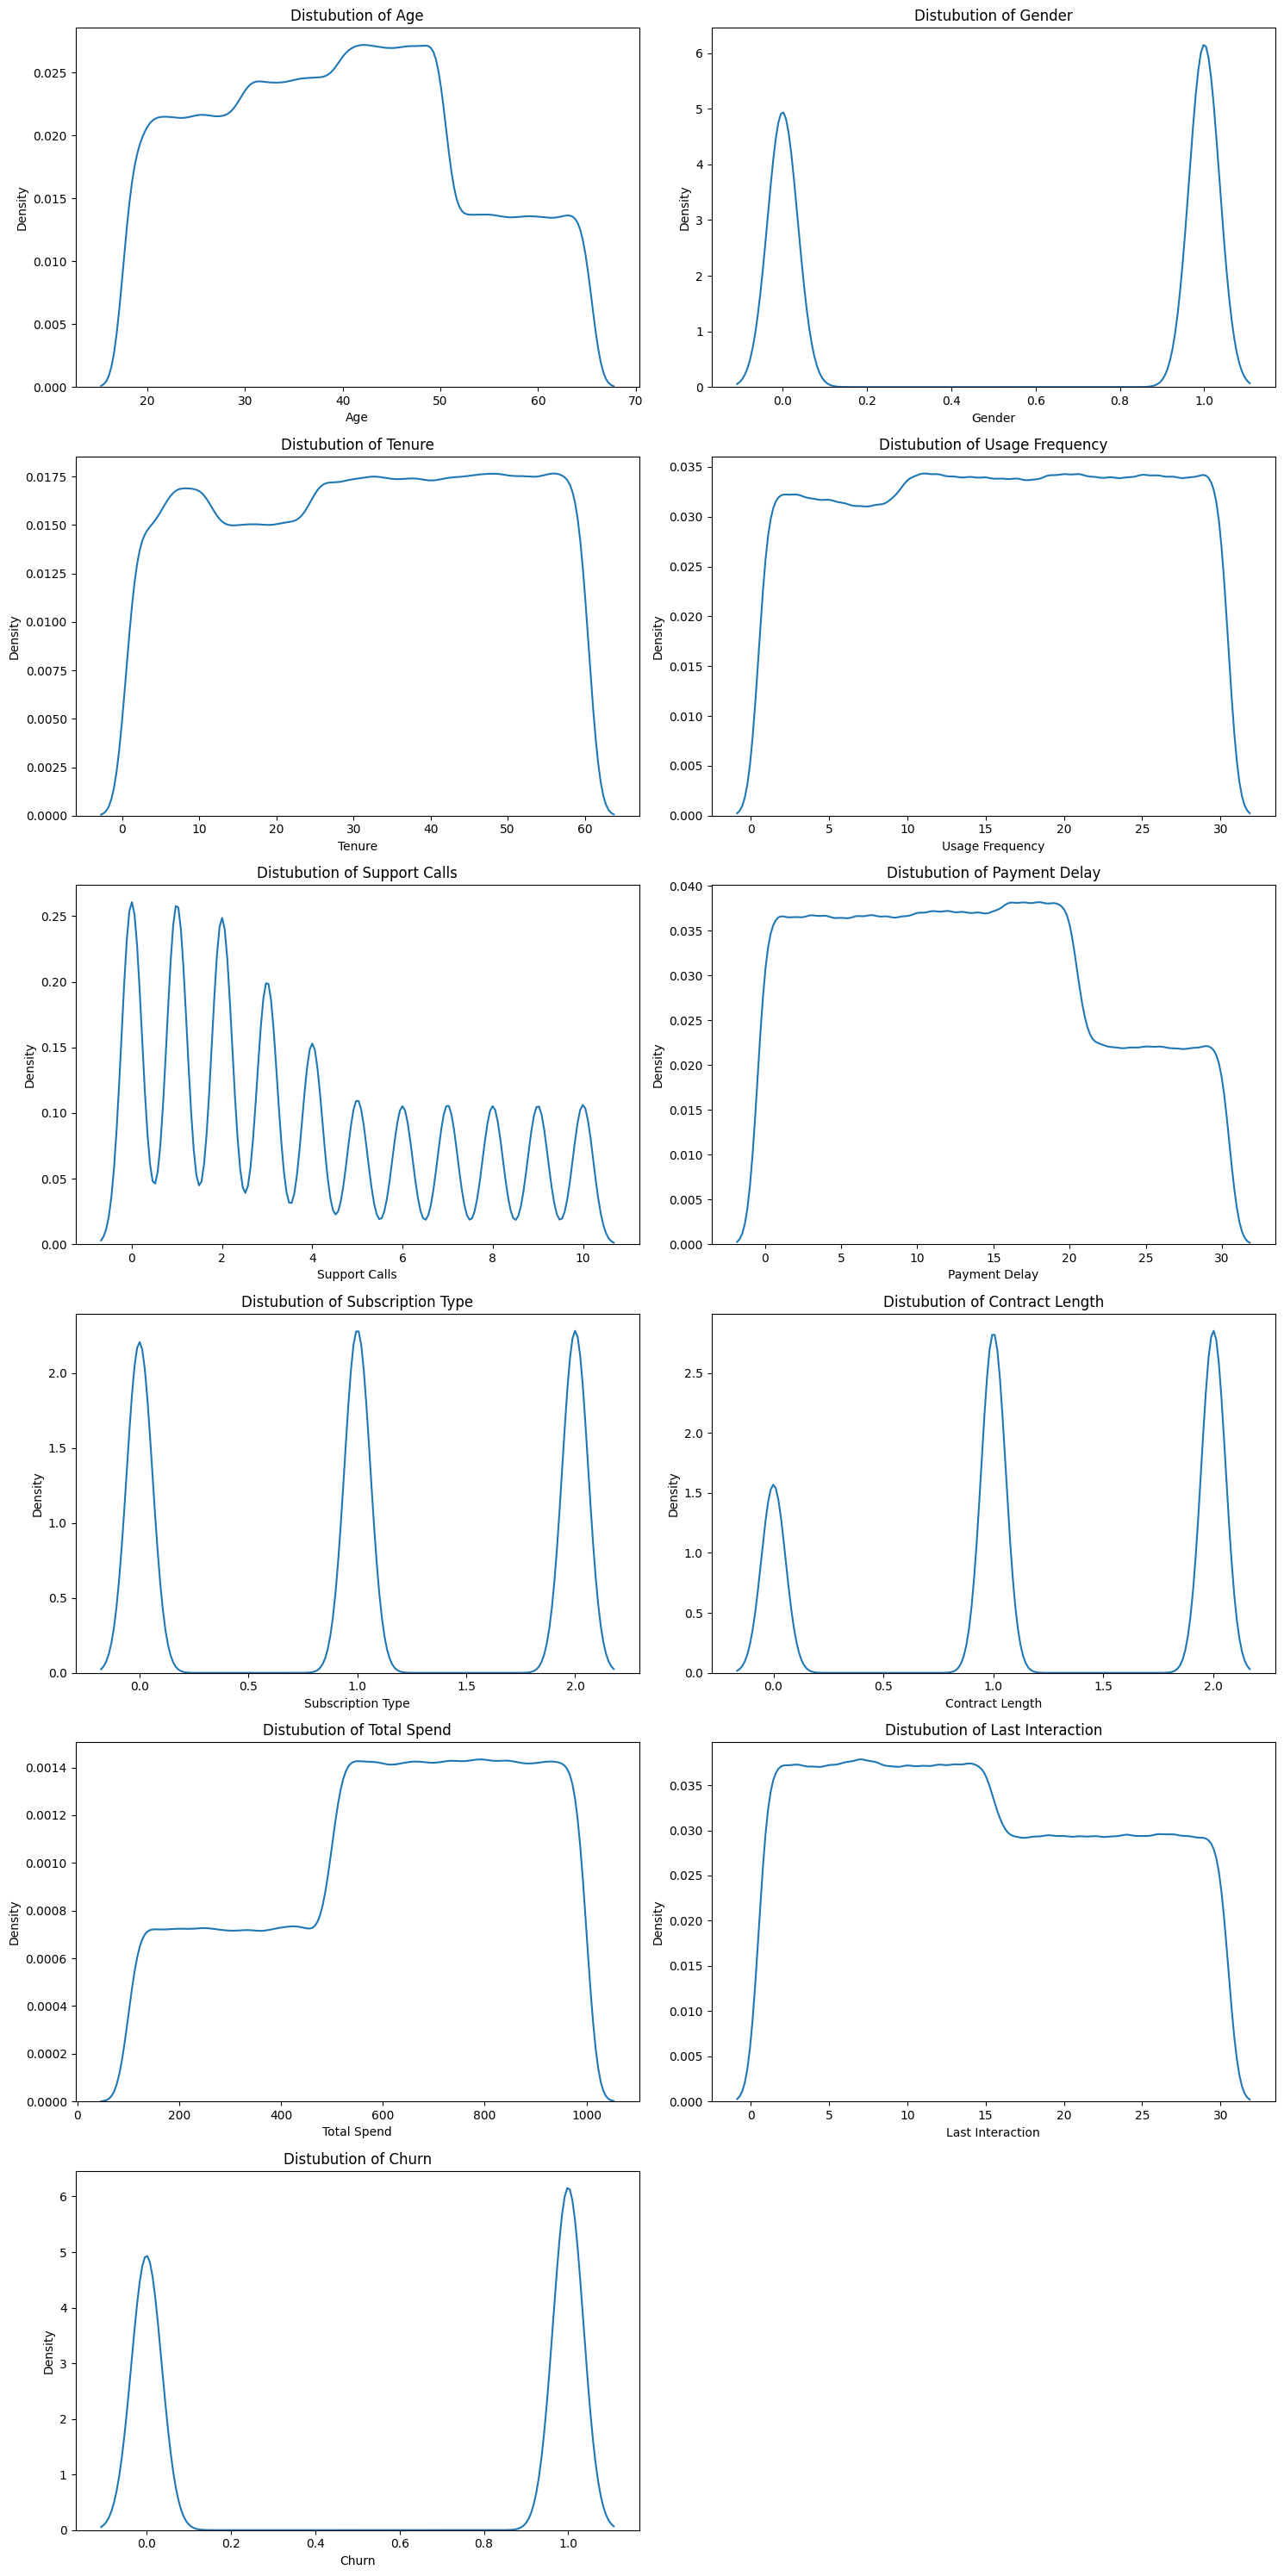

In [20]:
plt.figure(figsize=(15,30))
for i,x in enumerate(numerical,1):
    plt.subplot(6,2,i)
    sns.kdeplot(df[x])
    plt.xlabel(x)
    plt.title(f"Distubution of {x}")
    plt.plot()
    plt.tight_layout(h_pad=1.08)

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [22]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [23]:
import pickle
with open('minmax_scale.pkl','wb')as file:
    pickle.dump(minmax,file)

In [24]:
features = [30.0,0,39,14,5,18,1,2,932,17]
features_array = np.array(features).reshape(1, -1)
scaled_features = minmax.transform(features_array)

/Users/ppraveen/Documents/ML_practise/practise/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [25]:
print("Scaled features:", scaled_features)

Scaled features: [[0.25531915 0.         0.6440678  0.44827586 0.5        0.6
  0.5        1.         0.92444444 0.55172414]]


In [26]:
df_X_train = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [28]:
df_X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [29]:
df_X_test[df_X_test['Last Interaction']==0.551724]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction


In [30]:
#%%
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 5, 6, 7, 10],  # Limit max_depth further
    'min_samples_split': [5, 10, 20],  # Higher min_samples_split to prevent overfitting
    'min_samples_leaf': [2, 4, 6],  # Increase leaf samples
    'max_features': ['sqrt', 'log2'],  # Limit the number of features considered for splits
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}


dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)


best_dt = grid_search.best_estimator_


y_pred_tuned = best_dt.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred_tuned))


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Hyperparameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 20}
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91     67219
         1.0       0.90      0.98      0.94     84343

    accuracy                           0.92    151562
   macro avg       0.93      0.92      0.92    151562
weighted avg       0.93      0.92      0.92    151562



In [31]:
import pickle

In [32]:
with open('best_dt.pkl','wb') as file:
    pickle.dump(best_dt, file)